In [1]:
"""
Name: con_distribution_comparison.ipynb
Authors: Stephan Meighen-Berger
Compares the different distributions implemented and their results
"""

'\nName: con_distribution_comparison.ipynb\nAuthors: Stephan Meighen-Berger\nCompares the different distributions implemented and their results\n'

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib.lines import Line2D

In [3]:
# Adding path to module
sys.path.append("../")

In [4]:
# picture path
PICS = '../pics/'

In [5]:
# Module imports
from contagion import Contagion, config

In [6]:
# Creating a fourth_day object
distributions = ['gauss', 'gamma']
run_count = 10
results = []
results_hosp = []
for distribution in distributions:
    tmp_store = []
    tmp_store_hosp = []
    for _ in range(run_count):
        config["population size"] = 1000
        config['infection duration pdf'] = distribution
        config['infectious duration pdf'] = distribution
        config['incubation duration pdf'] = distribution
        config['hospitalization duration pdf'] = distribution
        config['time until hospitalization pdf'] = distribution
        config['time incubation death pdf'] = distribution
        config['recovery time pdf'] = distribution
        contagion = Contagion()
        # Storing the solutions
        contagion.sim()
        tmp_store.append(contagion.statistics['infectious'])
        tmp_store_hosp.append(contagion.statistics['hospitalized'])
    tmp_store = np.array(tmp_store)
    tmp_store_hosp = np.array(tmp_store_hosp)
    results.append(np.average(tmp_store, axis=0))
    results_hosp.append(np.average(tmp_store_hosp, axis=0))

In [7]:
# Plotting standards
std_size = 10.
fontsize = 20.
lw=3.
h_length=1.
# from matplotlib import rc
# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# rc('text', usetex=True)

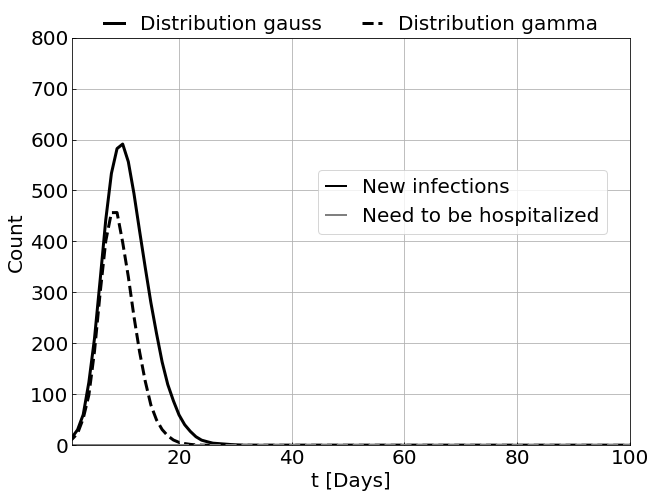

In [8]:
# Infections per time step
figure, ax = plt.subplots(figsize=(std_size, std_size * 6. / 8.))
linestyl = ['-', '--']
for i, distribution in enumerate(distributions):
    ax.plot(contagion.t, results[i],
            lw=lw, ls=linestyl[i], label='Distribution %s' %distribution,
            color='k')
    ax.plot(contagion.t, results_hosp[i],
            lw=lw, ls=linestyl[i],
            color='grey')
ax.set_xlim(1e0, 100)
ax.set_ylim(0., 800)
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_xlabel(r't [Days]', fontsize=fontsize)
ax.set_ylabel(r'Count', fontsize=fontsize)
ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in ['k', 'grey']]
labels = ['New infections', 'Need to be hospitalized']
h, l = ax.get_legend_handles_labels()
lgd1 = ax.legend(h,l, loc=9, bbox_to_anchor=(0.5, +1.1),
                 ncol=4, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
lgd2 = ax.legend(lines,labels, loc=9, bbox_to_anchor=(0.7, +0.7),
                 ncol=1, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=True)
ax.add_artist(lgd1)
plt.grid(True)
plt.show()

In [9]:
figure.savefig(PICS + "Contagion_Distribution.png",
               bbox_inches='tight')